In [ ]:
import requests
import io
from PIL import Image
import time

def generate_api_image(prompt, filename, token):
    API_URL = "https://router.huggingface.co/hf-inference/models/stabilityai/stable-diffusion-xl-base-1.0"
    headers = {"Authorization": f"Bearer {token}"}

    print(f"Генерируем: {prompt}...")
    
    payload = {
        "inputs": prompt,
        "parameters": {
            "negative_prompt": "blurry, bad quality, distorted",
            "num_inference_steps": 30
        }
    }

    response = requests.post(API_URL, headers=headers, json=payload)

    if response.status_code == 503:
        print("Модель загружается, подождите немного...")
        time.sleep(20)
        response = requests.post(API_URL, headers=headers, json=payload)

    if response.status_code == 200:
        image_bytes = response.content
        image = Image.open(io.BytesIO(image_bytes))
        image.save(filename)
        print(f"Готово! Сохранено как {filename}")
    else:
        print(f"Ошибка {response.status_code}: {response.text}")

HF_TOKEN = "---" 

prompts = [
    "A steampunk owl with mechanical wings and brass goggles, sitting on a pile of old books",
    "Cyberpunk street market in Tokyo, rainy night, neon signs reflecting in puddles, cinematic composition",
    "A cozy hobbit hole interior with a warm fireplace and round wooden doors, highly detailed digital painting"
]

for i, p in enumerate(prompts):
    generate_api_image(p, f"image_{i+1}.png", HF_TOKEN)

Генерируем: A steampunk owl with mechanical wings and brass goggles, sitting on a pile of old books...
Готово! Сохранено как image_1.png
Генерируем: Cyberpunk street market in Tokyo, rainy night, neon signs reflecting in puddles, cinematic composition...
Готово! Сохранено как image_2.png
Генерируем: A cozy hobbit hole interior with a warm fireplace and round wooden doors, highly detailed digital painting...
Готово! Сохранено как image_3.png


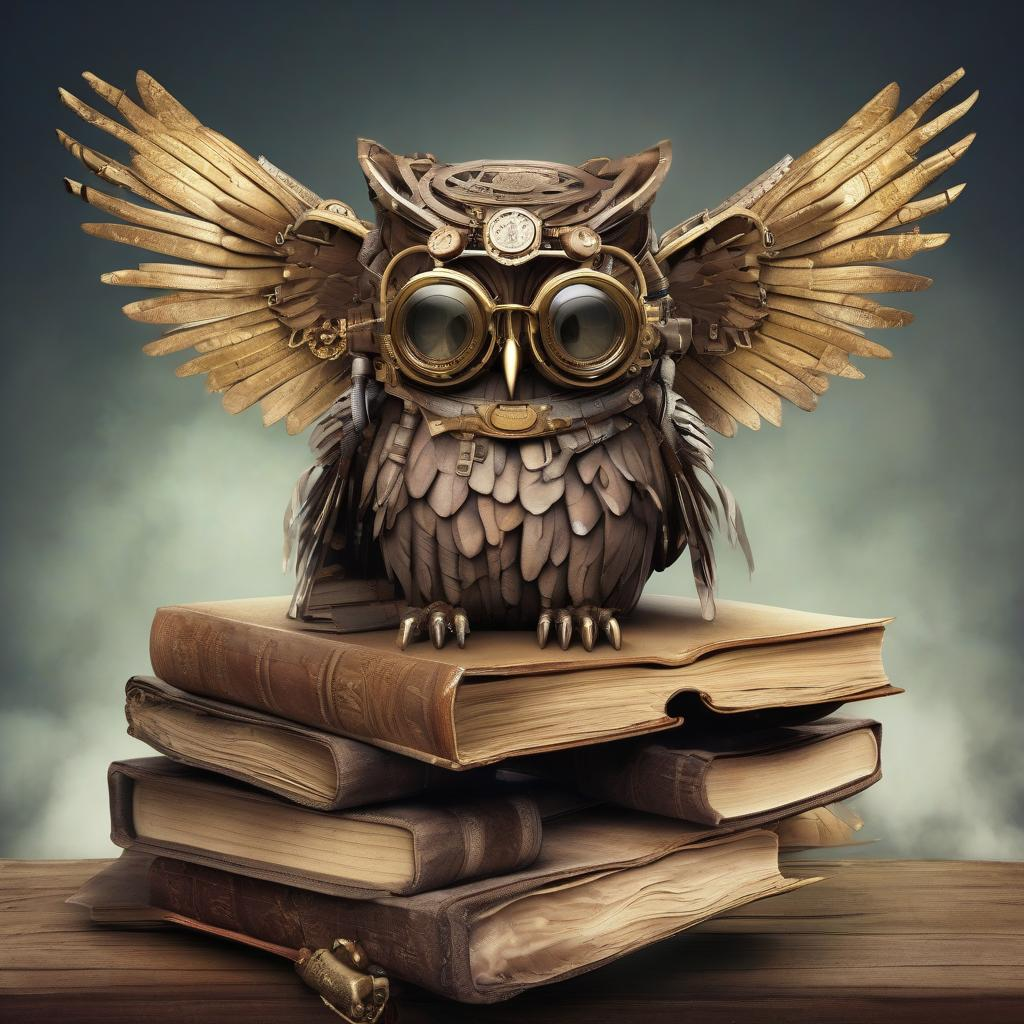

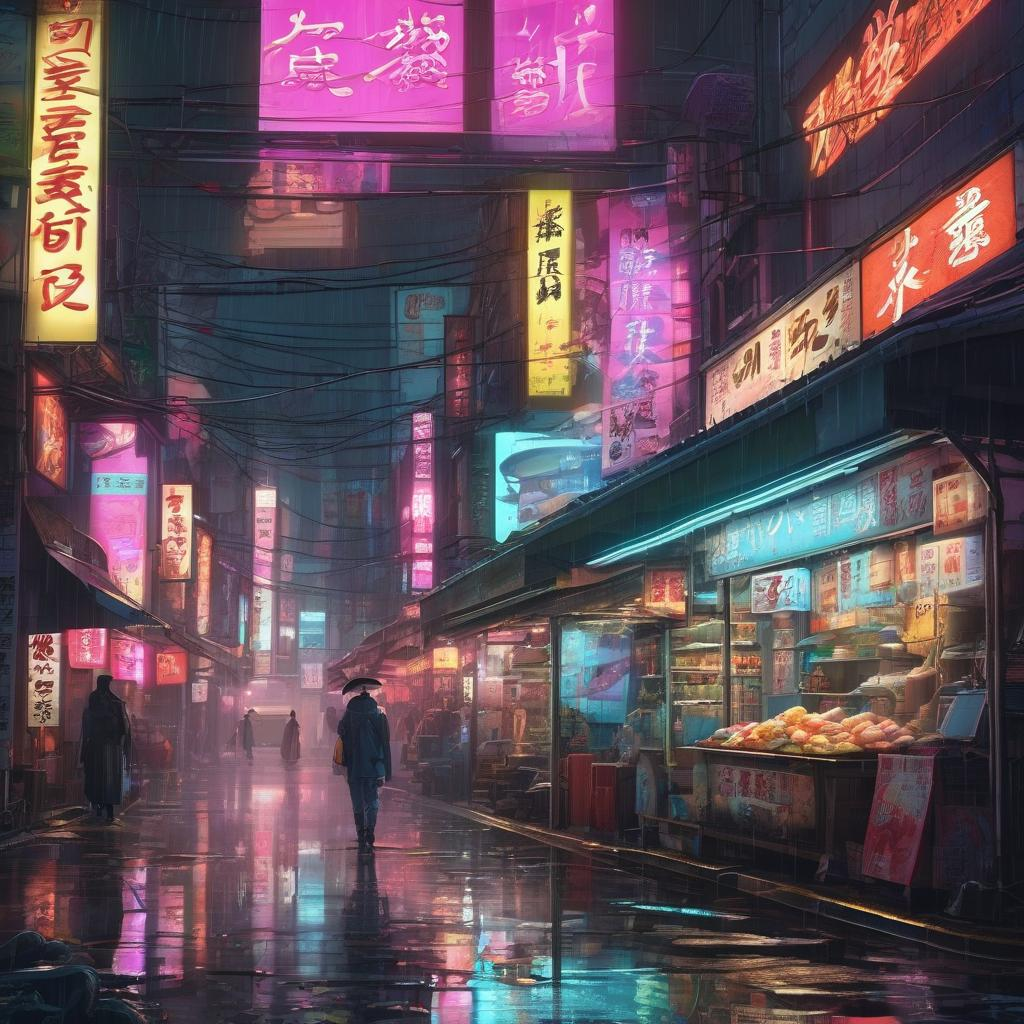

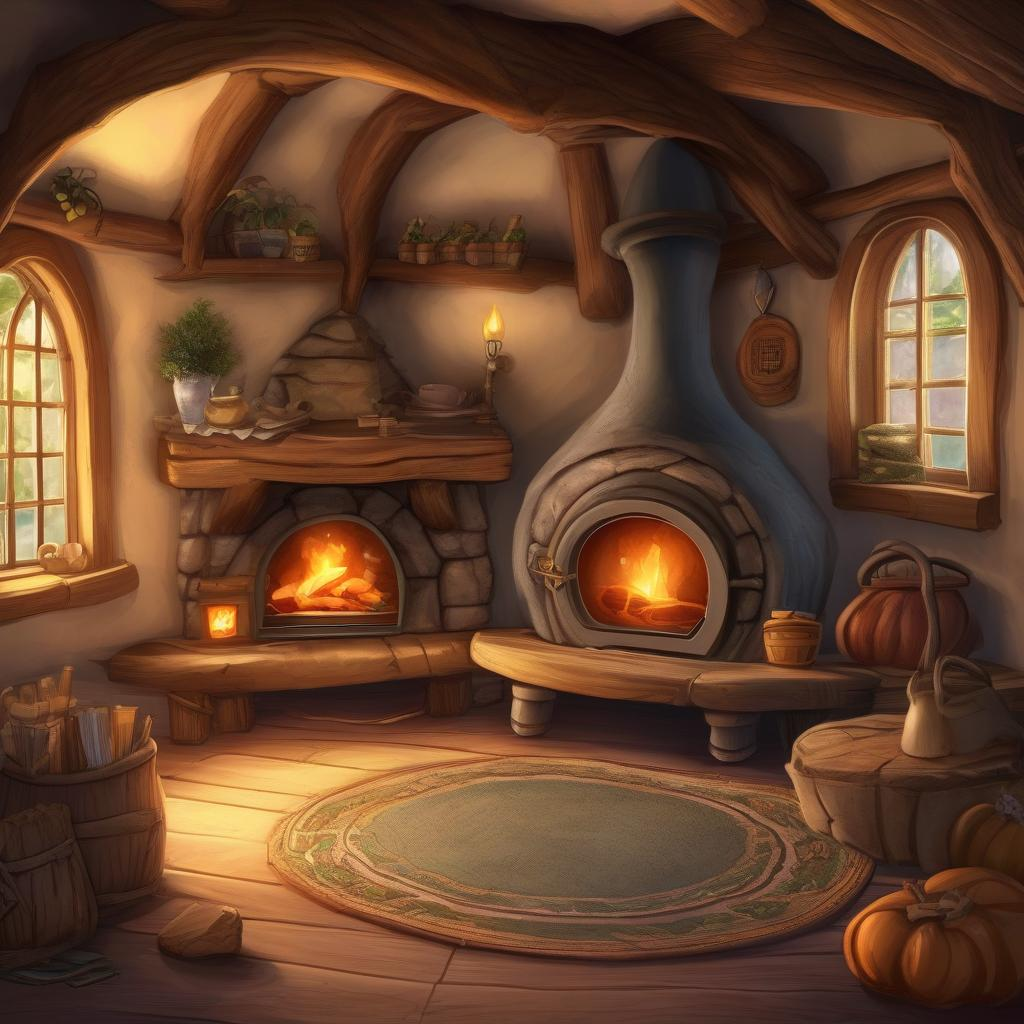